<a href="https://colab.research.google.com/github/JedWojtowicz/MAD_jw/blob/main/JW_lab_10_PD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# przydadzą nam się poniższe moduły do wizualizacji
!pip install seaborn plotly plotly[express] anywidget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.5/842.5 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.7 MB/s eta 0:00:00


In [2]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go

In [3]:
!pip install eurostat

In [67]:
import eurostat

toc = eurostat.get_toc()

## Zadania

**Zadanie 1**

Zbiór danych: `zamowienia.csv`

Bazując na przykładzie z wykresem plotly typu sunburst dla dwóch cech: `Kraj` oraz `Sprzedawca` stwórz wykresy tego samego typu:
* z rozkładem wartości dla cechy `Kraj` oraz roku z cechy `Data zamowienia`
* z rozkładem wartości dla cechy `Sprzedawca` oraz roku z cechy `Data zamowienia`
* z rozkładem wartości dla cechy `Kraj`, roku oraz `Sprzedawcy`.

Dla ułatwienia całej operacji stwórz w ramce danych kolumnę, która zawierać będzie wartość `year` z kolumny `Data zamowienia` (w komórce, w której zbiór został wczytany została skonwertowana na typ datetime).

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_10/data/zamowienia.csv', sep=';')
df['Data zamowienia'] = pd.to_datetime(df['Data zamowienia'])
year = df['Data zamowienia'].dt.year

In [6]:
#z rozkładem wartości dla cechy Kraj oraz roku z cechy Data zamowienia
fig = px.sunburst(df, path=['Kraj', year], values='Utarg')
fig.show()

In [7]:
#z rozkładem wartości dla cechy Sprzedawca oraz roku z cechy Data zamowienia
fig = px.sunburst(df, path=['Sprzedawca', year], values='Utarg')
fig.show()

In [9]:
#z rozkładem wartości dla cechy Kraj, roku oraz Sprzedawcy
fig = px.sunburst(df, path=['Kraj', year ,'Sprzedawca'], values='Utarg')
fig.show()

**Zadanie 2**

Zbiór danych: EUROSTAT `DEMO_GIND` (ten sam co w przykładach).

Odpowiedz na poniższe pytania dotyczące powyższego zbioru:

**2.1** Jak wygląda wykres zmiany średniej liczby ludności (indic_de = AVG) dla strefy Euro (geo = EA19)?

**2.2** Jak wygląda wskaźnik śmiertelności dla Polski w porównaniu z tym samym wskaźnikiem dla Niemiec, Czech, Francji oraz Szwecji? Wyświetl dane w postaci wykresu liniowego dla wielu serii.

**2.3** Jak wygląda struktura ludności 20 najludniejszych państw Unii Europejskiej za rok 2023? Dane wyświetl na wykresie kołowym z wykorzystaniem biblioteki plotly.

**2.4** Które 3 państwa mają najbardziej zbliżoną liczbę ludności do Polski biorąc pod uwagę rok 2023?

**2.5** Wyświetl wykres liniowy porównujący liczbę narodzin i śmierci (wykorzystaj bibliotekę plotly) dla Unii Europejskiej w latach 2007-2023. Tutaj należy złączyć dane z trzech cech geo w jeden wektor:

* [EU27_2020] - European Union - 27 countries (from 2020)
* [EU28] European Union - 28 countries (2013-2020)
* [EU27_2007] European Union - 27 countries (2007-2013)

Pamiętaj o odpowiedniej kolejności złączenia tych danych.

In [17]:
data = eurostat.get_data_df('DEMO_GIND')
data = data.rename(columns={r'geo\TIME_PERIOD': 'geo'})

<Axes: >

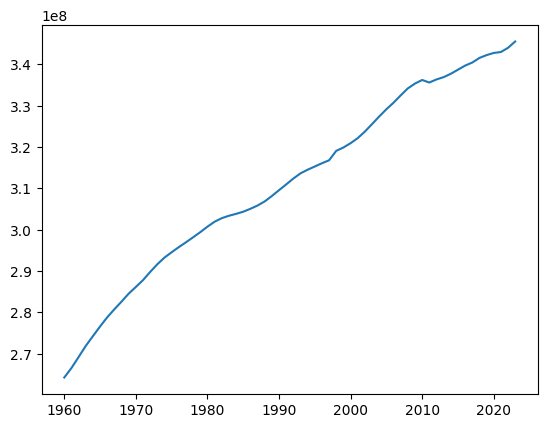

In [11]:
#2.1
num_cols = data.dtypes[data.dtypes == 'float64'].index.values
df = data[(data['indic_de'] == 'AVG') & (data['geo'] == 'EA19')].loc[:, num_cols].dropna(axis=1)
df.T.plot(legend=False)

<Axes: >

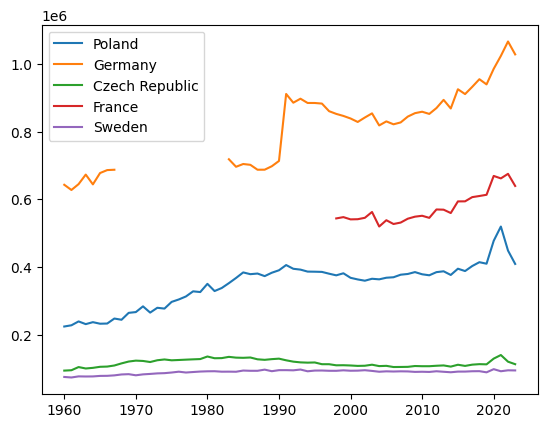

In [44]:
#2.2: Jak wygląda wskaźnik śmiertelności dla Polski w porównaniu z tym samym wskaźnikiem dla Niemiec, Czech, Francji oraz Szwecji? Wyświetl dane w postaci wykresu liniowego dla wielu serii.
df_pl = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'PL')].loc[:, num_cols]
df_de = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'DE')].loc[:, num_cols]
df_cz = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'CZ')].loc[:, num_cols]
df_fr = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'FR')].loc[:, num_cols]
df_se = data[(data['indic_de'] == 'DEATH') & (data['geo'] == 'SE')].loc[:, num_cols]
df_pl.rename(index={223:'Poland'}, inplace=True)
df_de.rename(index={189:'Germany'},inplace=True)
df_fr.rename(index={204:'France'},inplace=True)
df_se.rename(index={228:'Sweden'},inplace=True)
df_cz.rename(index={188:'Czech Republic'},inplace=True)
s = pd.concat([df_pl, df_de, df_cz, df_fr, df_se])
s.T.plot()

In [99]:
#2.3 Jak wygląda struktura ludności 20 najludniejszych państw Unii Europejskiej za rok 2023? Dane wyświetl na wykresie kołowym z wykorzystaniem biblioteki plotly.
geo = data[(data['indic_de'] == 'AVG')].T.iloc[2]
pop = data[(data['indic_de'] == 'AVG')].T.iloc[66]
plot_data = pd.merge(geo,pop, left_index=True, right_index=True)
top = plot_data.sort_values(by="2023",ascending=False)
top.drop(index=[24,16,15,13,20,18,19,23,25],inplace=True)
top20=top.head(20)
fig = px.pie(top20, values='2023', names='geo')
fig.show()

In [133]:
#2.4 Które 3 państwa mają najbardziej zbliżoną liczbę ludności do Polski biorąc pod uwagę rok 2023?
pop_pl = top[(top['geo'] == 'PL')]
pop_pl = pop_pl['2023'].iloc[0]
top10 = top.head(10)
top10_no_pl = top10.drop(index=[46])
top10_no_pl = pd.merge(top10_no_pl['geo'],(top10_no_pl['2023'] - pop_pl).abs(), left_index=True, right_index=True)
top10_no_pl.sort_values(by='2023',ascending=True).head(3)

,geo,2023
22,ES,11665175.0
48,RO,17626291.0
44,NL,18810236.0


In [144]:
#2.5 Wyświetl wykres liniowy porównujący liczbę narodzin i śmierci (wykorzystaj bibliotekę plotly) dla Unii Europejskiej w latach 2007-2023. Tutaj należy złączyć dane z trzech cech geo w jeden wektor:
#[EU27_2020] - European Union - 27 countries (from 2020)
#[EU28] European Union - 28 countries (2013-2020)
#[EU27_2007] European Union - 27 countries (2007-2013)

geo_filter = ['EU27_2020', 'EU28', 'EU27_2007']
indicator_filter = ['LBIRTH', 'DEATH']


filtered = data[
    data['geo'].isin(geo_filter) &
    data['indic_de'].isin(indicator_filter)
]


long_df = filtered.melt(
    id_vars=['geo', 'indic_de'],
    var_name='year',
    value_name='value'
)


long_df['year'] = pd.to_numeric(long_df['year'], errors='coerce')
long_df = long_df.dropna(subset=['year', 'value'])
long_df['year'] = long_df['year'].astype(int)
long_df = long_df[(long_df['year'] >= 2007) & (long_df['year'] <= 2023)]


grouped = long_df.groupby(['year', 'indic_de'])['value'].sum().reset_index()


pivot = grouped.pivot(index='year', columns='indic_de', values='value').reset_index()


fig = px.line(
    pivot,
    x='year',
    y=['LBIRTH', 'DEATH'],
    labels={'value': 'Liczba osób', 'year': 'Rok', 'LBIRTH': 'Urodzenia', 'DEATH': 'Zgony'},
    title='Liczba urodzeń i zgonów w UE (2007–2023)'
)
fig.update_traces(mode='lines+markers')
fig.show()